<a href="https://www.kaggle.com/code/omarreess/animals-images-detection-cnn?scriptVersionId=112751005" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Animal Images Detection  
 * ETL Process  
 * Data Augmentation
 * CNN Architecture Model for Detection
 * Debuging & Visualizing Model Outputs
 * Transfer Learning with VGG16 Model for Improving Accuracy

# **Importing**

In [1]:
# Import Libs
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from zipfile import ZipFile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
!pip install visualkeras
import visualkeras
from PIL import ImageFont


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 3.7 MB/s eta 0:00:00


In [2]:
# Check data file names
print(os.listdir("../input/dogs-vs-cats"))


['test1.zip', 'train.zip', 'sampleSubmission.csv']


In [3]:
# Extract File Names 
ZipFile("/kaggle/input/dogs-vs-cats/train.zip","r").extractall()  # os.listdir("../input/dogs-vs-cats")[1]
ZipFile("/kaggle/input/dogs-vs-cats/test1.zip", "r").extractall()  # os.listdir("../input/dogs-vs-cats")[0]

# **ETL Process** 

In [4]:
# Loading Data 

filenames_train = os.listdir("./train/")
filenames_test = os.listdir("./test1/")

# Training data 
categories = []
for filename in filenames_train:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append("dog")
    else:
        categories.append("cat")

dataset = pd.DataFrame({
    'filename': filenames_train,
    'category': categories
})

# Testing Data 
test_df = pd.DataFrame({
    'filename': filenames_test
})

nb_samples = test_df.shape[0]

dataset.head

<bound method NDFrame.head of             filename category
0       cat.9464.jpg      cat
1      cat.11704.jpg      cat
2       cat.9628.jpg      cat
3       dog.4426.jpg      dog
4       dog.7360.jpg      dog
...              ...      ...
24995   dog.6799.jpg      dog
24996   dog.7671.jpg      dog
24997   cat.2771.jpg      cat
24998   dog.8624.jpg      dog
24999   dog.6279.jpg      dog

[25000 rows x 2 columns]>

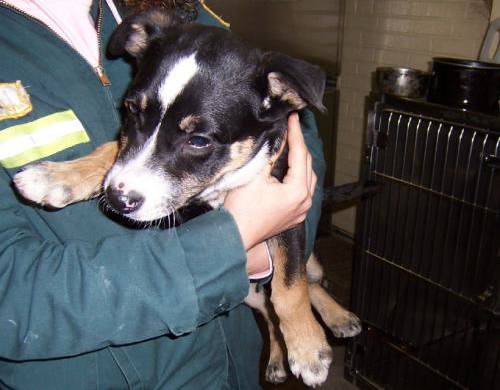

In [5]:
# Show input sample 
load_img('./train/'+dataset.filename[150])


In [6]:
# Split Data 
dataset_train, dataset_validate = train_test_split(dataset, test_size = 0.28, random_state = 150)
dataset_train = dataset_train.reset_index(drop=True)
dataset_validate = dataset_validate.reset_index(drop=True)

In [7]:
# Handle Image Generator + Augmenting Data 

## Trainning Gen
train_datagen = ImageDataGenerator(rotation_range=40,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    dataset_train, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
   shuffle=True
)

## Validation Gen
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    dataset_validate, 
    "./train/", 
    x_col='filename',
    y_col='category',
    target_size=(120,120),
    class_mode='binary',
    batch_size=64,
    color_mode="rgb",
    #shuffle=True
)

Found 17999 validated image filenames belonging to 2 classes.
Found 7001 validated image filenames belonging to 2 classes.


# **Model Architecture**

2022-12-02 12:06:52.358379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 12:06:52.461680: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 12:06:52.462851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 12:06:52.466183: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

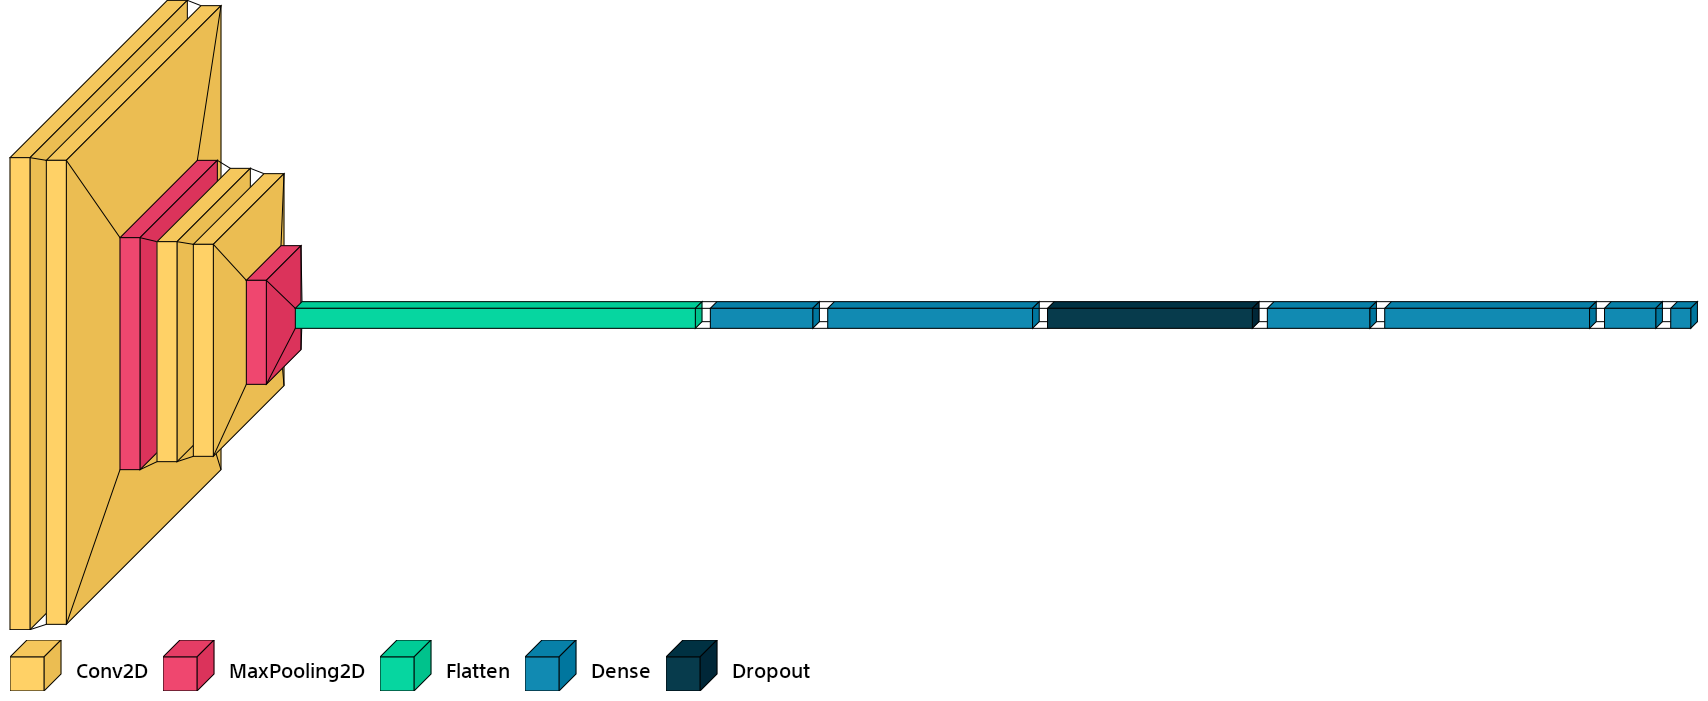

In [8]:
# CNN Layer 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2), 
tf.keras.layers.Conv2D(64, kernel_size=(4, 4), activation='relu' , ),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])



# Visualize Model Layers
font = ImageFont.truetype('../input/font-sample/alfont_com_SST-Arabic-Medium.ttf', 20)   
visualkeras.layered_view(model, legend=True, spacing=15   , font = font ) 


In [9]:
# Learning
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=250,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=100
)


2022-12-02 12:06:55.960771: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/35


2022-12-02 12:06:58.371190: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


250/250 [==============================] - 120s 446ms/step - loss: 1.1756 - accuracy: 0.5121 - val_loss: 0.7154 - val_accuracy: 0.5073
Epoch 2/35
250/250 [==============================] - 110s 440ms/step - loss: 0.7099 - accuracy: 0.5314 - val_loss: 0.6838 - val_accuracy: 0.5766
Epoch 3/35
250/250 [==============================] - 111s 442ms/step - loss: 0.6923 - accuracy: 0.5647 - val_loss: 0.6694 - val_accuracy: 0.6239
Epoch 4/35
250/250 [==============================] - 111s 443ms/step - loss: 0.6861 - accuracy: 0.5886 - val_loss: 0.6752 - val_accuracy: 0.5789
Epoch 5/35
250/250 [==============================] - 115s 461ms/step - loss: 0.6754 - accuracy: 0.6004 - val_loss: 0.6326 - val_accuracy: 0.6464
Epoch 6/35
250/250 [==============================] - 112s 449ms/step - loss: 0.6550 - accuracy: 0.6297 - val_loss: 0.6266 - val_accuracy: 0.6464
Epoch 7/35
250/250 [==============================] - 110s 441ms/step - loss: 0.6470 - accuracy: 0.6426 - val_loss: 0.5816 - val_accura

# **Evaluate Model**

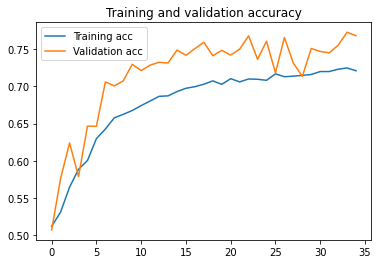

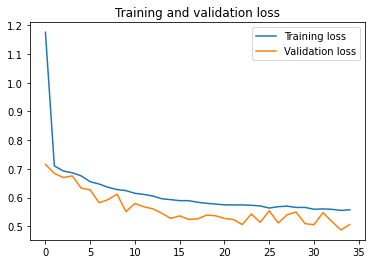

In [10]:
# Plot Loss & Accuracy 

acc      = history.history[  'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc))  

# Plot training and validation accuracy
plt.plot  ( epochs,     acc  , label='Training acc')
plt.plot  ( epochs, val_acc ,label='Validation acc')
plt.title ('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss

plt.plot  ( epochs,     loss ,label='Training loss')
plt.plot  ( epochs, val_loss ,label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend()


In [11]:
# predicting images
from keras.preprocessing import image



img = load_img('./train/'+dataset.filename[150],    target_size=(120,120),)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images,)

print( classes)

[[1.]]


In [12]:
# Checking output coding 

y_true_labels = train_generator. class_indices
y_true_labels


{'cat': 0, 'dog': 1}

In [13]:
## Test Gen

test_datagen = ImageDataGenerator(rescale=1./255)
 
test_generator = test_datagen.flow_from_dataframe(
     test_df,  "./test1/", 
     x_col='filename',
     y_col=None,

    shuffle = False,

    target_size=(120,120),
    class_mode=None,
    batch_size=1,
    color_mode="rgb",
 )

predict_test  = model.predict(test_generator,steps = len(filenames_test))




Found 12500 validated image filenames.


In [14]:
# Handle submission
dataset_test = pd.read_csv('../input/dogs-vs-cats/sampleSubmission.csv')
dataset_test.id=filenames_test 
dataset_test.label=[int(round(p[0])) for p in predict_test]
dataset_test.to_csv("submission.csv", index=False)
dataset_test

,id,label
0,2507.jpg,1
1,10270.jpg,0
2,10816.jpg,1
3,2863.jpg,0
4,11523.jpg,0
...,...,...
12495,2775.jpg,0
12496,2957.jpg,0
12497,9106.jpg,1
12498,6667.jpg,0


<AxesSubplot:>

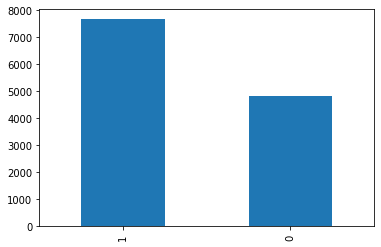

In [15]:
dataset_test['label'].value_counts().plot.bar()


# **Debugging Model's Output**

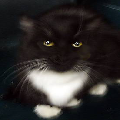

In [16]:
# handle image sample in model format

from keras.preprocessing import image

img = load_img('./train/'+dataset.filename[350],    target_size=(120,120),)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = np.vstack([img_tensor])

# Show input sample 
img
 

In [17]:
# Get Layers' output
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:3]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[1]
print(first_layer_activation.shape)

(1, 116, 116, 32)


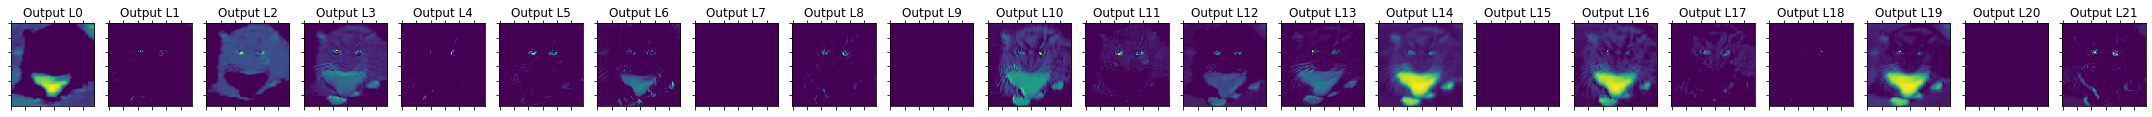

In [18]:
#Show Output Feature Maps

first_layer_activation= np.delete(first_layer_activation, range(8,18) , 3)

layers_num=first_layer_activation.shape[3]
fig, axes = plt.subplots(1,layers_num, figsize = (30,5))

for i in range(layers_num) : 
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])
    axes[i].matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Output L{i}')

    
fig.tight_layout()
plt.show()

# **Transfer Learning with VGG16 Model**

In [19]:
# VGG Base Model
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(120, 120, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [20]:
# Build Entire Model
from tensorflow.keras import models
from tensorflow.keras import layers

transfered_model = models.Sequential()
transfered_model.add(conv_base)
transfered_model.add(layers.Flatten())
transfered_model.add(layers.Dense(256, activation='relu'))
transfered_model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False
transfered_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 15,894,849
Trainable params: 1,180,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
# learning

transfered_model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

history_transfered_model = transfered_model.fit(
    train_generator,
    steps_per_epoch=150,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=100
)


Epoch 1/5
150/150 [==============================] - 76s 491ms/step - loss: 0.6501 - accuracy: 0.6905 - val_loss: 0.3513 - val_accuracy: 0.8442
Epoch 2/5
150/150 [==============================] - 74s 493ms/step - loss: 0.4954 - accuracy: 0.7539 - val_loss: 0.3364 - val_accuracy: 0.8427
Epoch 3/5
150/150 [==============================] - 74s 497ms/step - loss: 0.4576 - accuracy: 0.7805 - val_loss: 0.3154 - val_accuracy: 0.8653
Epoch 4/5
150/150 [==============================] - 74s 494ms/step - loss: 0.4394 - accuracy: 0.7865 - val_loss: 0.3099 - val_accuracy: 0.8695
Epoch 5/5
150/150 [==============================] - 73s 488ms/step - loss: 0.4336 - accuracy: 0.7934 - val_loss: 0.2799 - val_accuracy: 0.8792


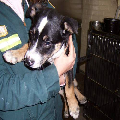

In [22]:
load_img('./train/'+dataset.filename[150],    target_size=(120,120),)


In [23]:
# predicting images
from keras.preprocessing import image


img = load_img('./train/'+dataset.filename[150],    target_size=(120,120),)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images,)

print(classes)

[[1.]]


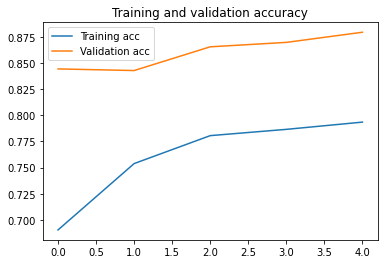

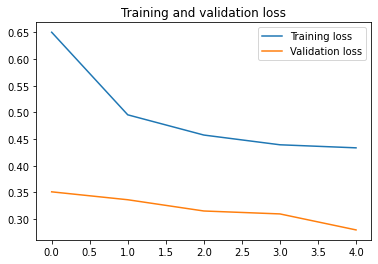

In [24]:
# Plot Loss & Accuracy 

acc      = history_transfered_model.history[  'accuracy' ]
val_acc  = history_transfered_model.history[ 'val_accuracy' ]
loss     = history_transfered_model.history[    'loss' ]
val_loss = history_transfered_model.history['val_loss' ]

epochs   = range(len(acc))  

# Plot training and validation accuracy 
 
plt.plot  ( epochs,     acc  , label='Training acc')
plt.plot  ( epochs, val_acc ,label='Validation acc')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot training and validation loss 
plt.plot  ( epochs,     loss ,label='Training loss')
plt.plot  ( epochs, val_loss ,label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend()
